# Data Science I Topic 4 - Feature Extraction of Images

Feature extraction techniques are important in image processing and computer vision for tasks like character or object recognition and segmentation. By extracting features from the images, we also reduce the dimensionality of the data which in turns may increase training and prediction speed as well as the accuracy.

In this tutorial, we will explore some image feature extraction techniques using `scikit-image`. In `scikit-image`, the images are saved as standard `numpy` array, not a special image class.

Let us see first an example of a gray scale image.

In [ ]:
# Run this cell

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import the camera image and save it as an array, I
from skimage.data import camera
I = camera()

# fill in the following to show the info about the image
print("Type:", type(I))
print("dtype:", I.dtype)
print("shape", I.shape)
print("Values min:", I.min())
print("Values max:", I.max())

Type: <class 'numpy.ndarray'>
dtype: uint8
shape (512, 512)
Values min: 0
Values max: 255


**Q**: What's the range of the pixel values, what do they correspond to?

**A**: Unsigned integer 0 (black) to 255 (white)

<u>Let's show the image.</u>

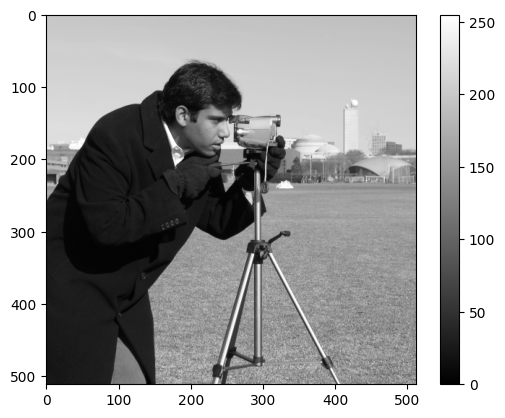

In [ ]:
# Run the cell below
plt.imshow(I, cmap="gray")
plt.colorbar();

We can convert the intensity range of the image from 0-255 (uint8) to 0-1 (float), which may be necessary along your research pipeline.

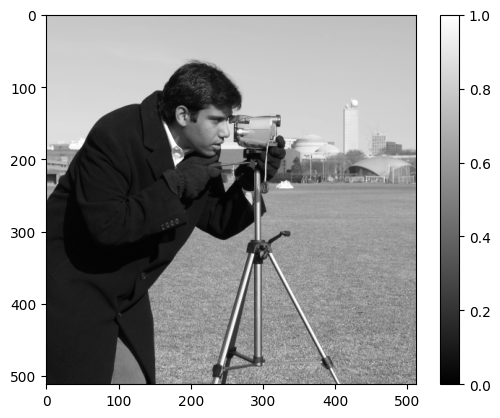

In [ ]:
from skimage import img_as_float

dI = img_as_float(I)

# Show the image dI together with the colorbar
plt.imshow(dI, cmap="gray")
plt.colorbar();

A feature descriptor is a simplified representation of the image that contains only the most important information about the image. In this section, we discuss what feature descriptors one may derive from an image.

## Raw gray scale pixel values

The simplest feature is the raw pixel values.

**Q**: For our `camera` picture, how many features are there and how do we arrange these features to be used in, say, a classifier?

**A**: There are 512x512 = 262,144 features. Usually the features with raw pixel values are taken row-wise to make a vector (i.e. flatten the image into a 1D vector). In this case, a 262,144 x 1 feature vector.

## Average of RGB values

Let's first import a color image from `skimage.data`.

In [ ]:
from skimage.data import chelsea
I = chelsea()
# fill in the following
print("Type:", type(I))
print("dtype:", I.dtype)
print("shape", I.shape)
print("Values min [R G B]:", I.min(axis=(0,1)))
print("Values max [R G B]:", I.max(axis=(0,1)))

Type: <class 'numpy.ndarray'>
dtype: uint8
shape (300, 451, 3)
Values min [R G B]: [2 4 0]
Values max [R G B]: [215 189 231]


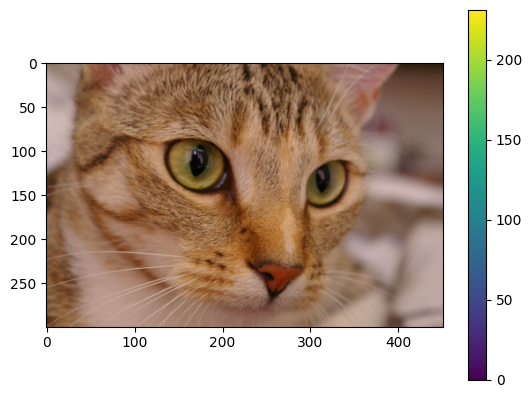

In [ ]:
# Show the color image
plt.imshow(I)
plt.colorbar();

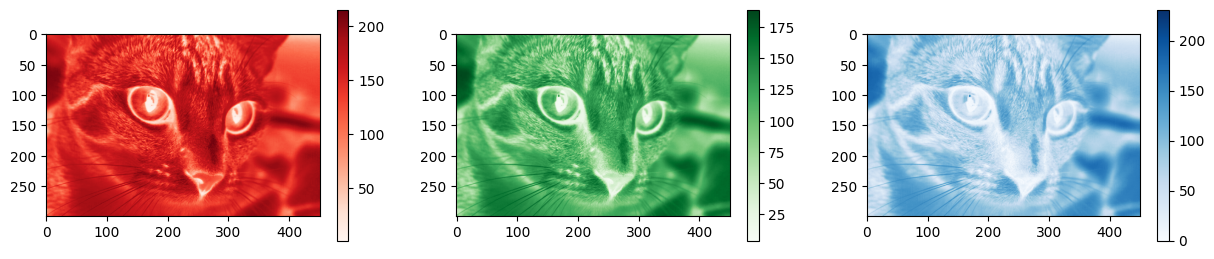

In [ ]:
# Here we visualize all the three channels
# Complete the following

# Split
r = I[...,0]
g = I[...,1]
b = I[...,2]

fig, axs = plt.subplots(1, 3, figsize=(15,3))

# Red channel
rx = axs[0].imshow(r, cmap='Reds')
fig.colorbar(rx, ax=axs[0])

# Green
rx = axs[1].imshow(g, cmap='Greens')
fig.colorbar(rx, ax=axs[1])

# Blue
rx = axs[2].imshow(b, cmap='Blues')
fig.colorbar(rx, ax=axs[2])

plt.show()

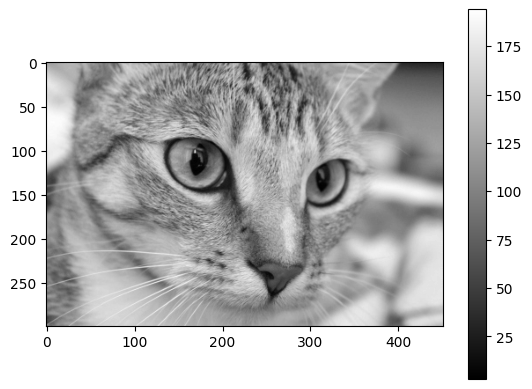

In [31]:
# Now average the channels and display it
#I_ave = ((r+g+b)/3).astype(np.uint8)
I_ave = (0.299*r + 0.587*g + 0.114*b).astype(np.uint8)

plt.imshow(I_ave, cmap="gray")
plt.colorbar();

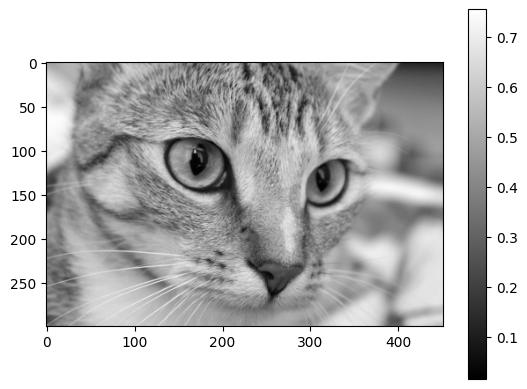

In [ ]:
# Compare to the following result using rgb2gray
from skimage.color import rgb2gray
# In rgb2gray Gray=0.299*r + 0.587*g + 0.114*b
I_rgb2gray = rgb2gray(I)
plt.imshow(I_rgb2gray, cmap="gray")
plt.colorbar();

## Edge Features

Edge is where there is a sharp change in color. Let's use again the black and white `camera` image.

In [ ]:
# Get the camera image
I = camera()

We'll compare the results of four edge detectors: roberts, sobel, scharr, and prewitt.

In [ ]:
# Print out the kernels for these four edge detectors.
print("Roberts \n", np.array([[1,0], [0,-1]])) # the result is Gx
print(np.array([[0,1], [-1,0]])) #Gy

Roberts 
 [[ 1  0]
 [ 0 -1]]
[[ 0  1]
 [-1  0]]


In [ ]:
print("Sobel \n", np.array([[1,0,-1], [2,0,-2], [1,0,-1]])) # the result is Gx
print(np.array([[1,2,1], [0,0,0], [-1,-2,-1]])) #Gy

Sobel 
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [ ]:
print("Scharr \n", np.array([[47,0,-47], [162,0,-162], [47,0,-47]])) # the result is Gx
print(np.array([[47,162,47], [0,0,0], [-47,-162,-47]])) #Gy

Scharr 
 [[  47    0  -47]
 [ 162    0 -162]
 [  47    0  -47]]
[[  47  162   47]
 [   0    0    0]
 [ -47 -162  -47]]


In [ ]:
print("Prewitt \n", np.array([[1,0,-1], [1,0,-1], [1,0,-1]])) # the result is Gx
print(np.array([[1,1,1], [0,0,0], [-1,-1,-1]])) #Gy

Prewitt 
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


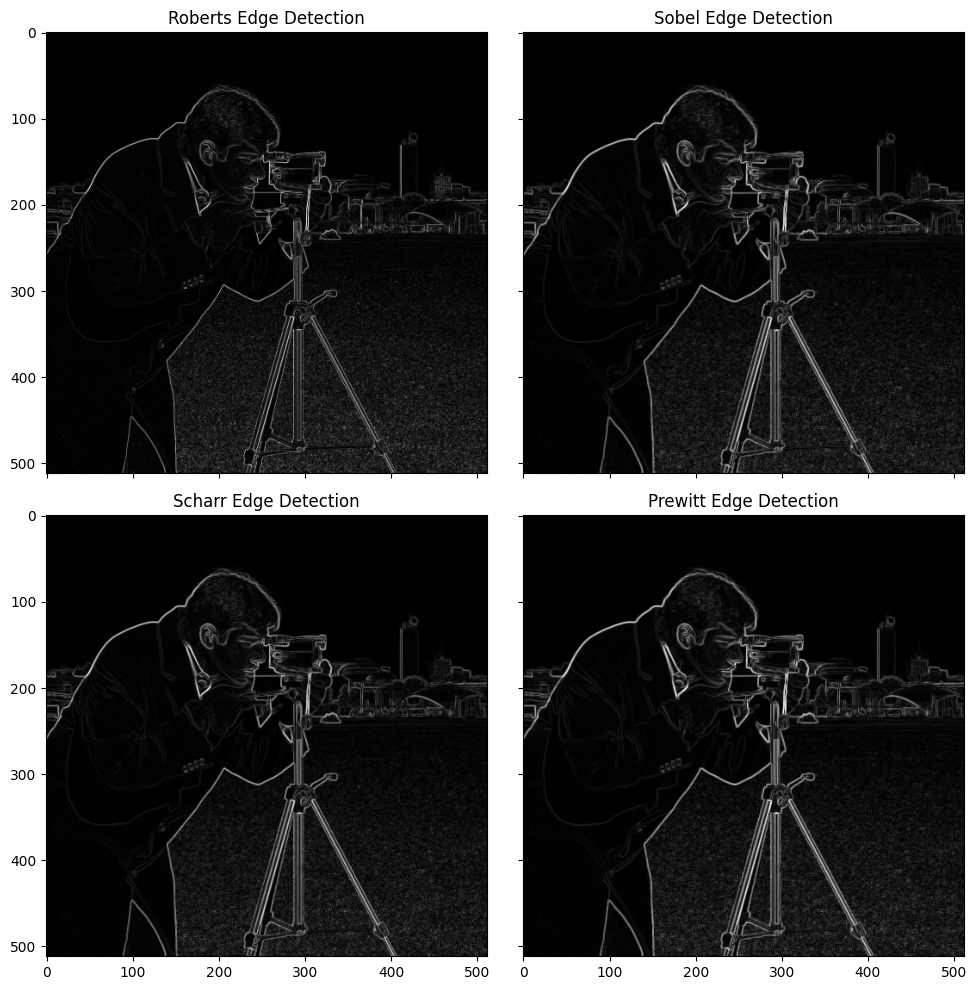

In [ ]:
from skimage.filters import roberts, sobel, scharr, prewitt

I_roberts = roberts(I)
I_sobel = sobel(I)
I_scharr = scharr(I)
I_prewitt = prewitt(I)

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0,0].imshow(I_roberts, cmap="gray")
ax[0,0].set_title('Roberts Edge Detection')

ax[0,1].imshow(I_sobel, cmap="gray")
ax[0,1].set_title('Sobel Edge Detection')

ax[1,0].imshow(I_scharr, cmap="gray")
ax[1,0].set_title('Scharr Edge Detection')

ax[1,1].imshow(I_prewitt, cmap="gray")
ax[1,1].set_title('Prewitt Edge Detection')

plt.tight_layout()
plt.show()

Also look into: Canny edge detector, Laplacian of Gaussian (LoG), Difference of Gaussians (DoG), phase congruency, HED, DeepContour, gradient learning methods.

**Q**: What might be the problem with edge detectors?

**Ans**:
Edge detectors are not scale and position (viewpoint) invariant which make comparison difficult.
We want to extract features that can correctly match a large database of features from many training images.

Next we'll see more methods that tackle this problem.

## Histogram of Oriented Gradients (HOG)

Research:

1. What is the advantage of HOG over an edge detector?
2. Briefly summarize the algorithm.

**Ans**:
1. The HOG descriptor does not only detect the edge existence, it also gives the edge direction by calculating the gradient and orientation of the edges.
2. The image is broken down into smaller regions. For each region, calculate the gradients and orientation:

$G_{x}$ Change in X direction

$G_{y}$ Change in Y direction

Gradient magnitude: $\sqrt{\left(G_{x}\right)^{2}+\left(G_{y}\right)^{2}}$

Gradient direction: $\tan^{-1}\left(G_{y}/G_{x}\right)$

<img src="T4_HOG_1.png" />

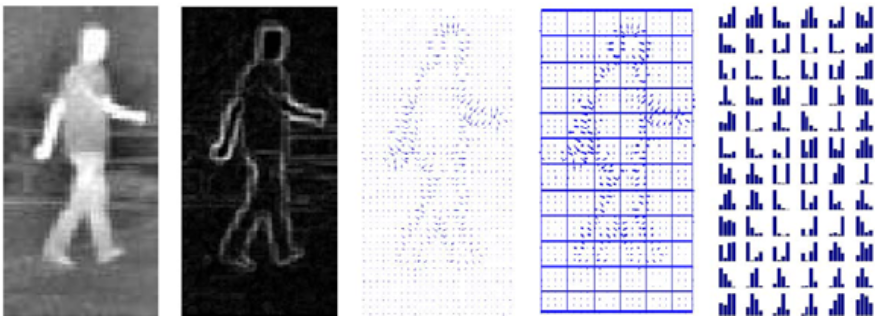

In [ ]:
# For Colab users
from IPython.display import Image
Image("/content/T4_HOG.png")

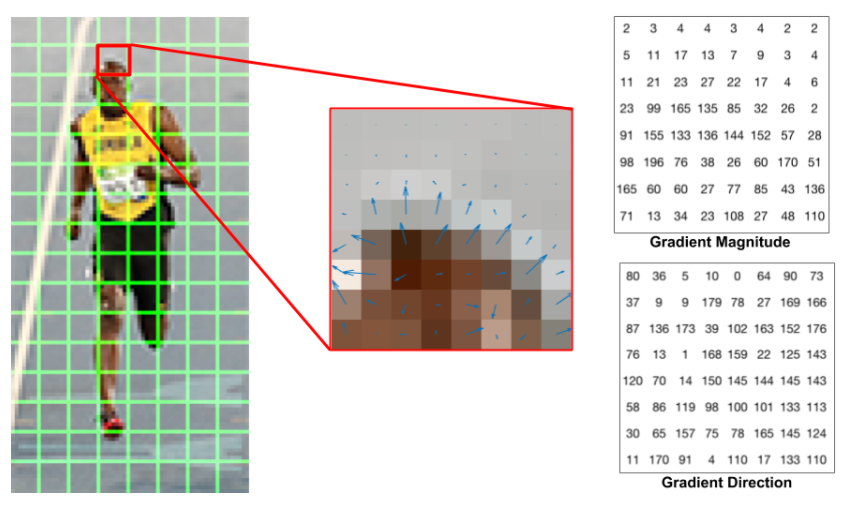

In [ ]:
Image("/content/T4_HOG_1.png")

Then generate a normalized histogram for each of the region.

<img src="T4_HOG_2.png" />

<img src="T4_HOG_3.png" />

<img src="T4_HOG_4.png" />

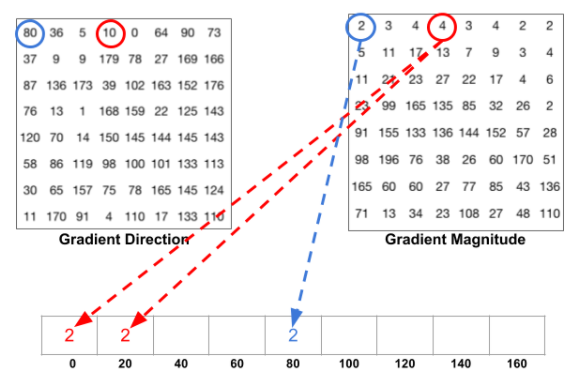

In [ ]:
Image("/content/T4_HOG_2.png")

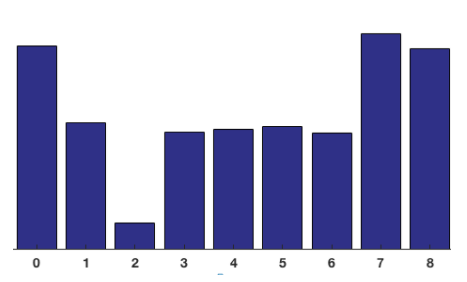

In [ ]:
Image("/content/T4_HOG_3.png")

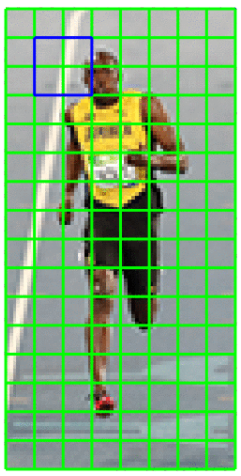

In [ ]:
Image("/content/T4_HOG_4.png")

Normalization over 2x2 block is done by L2 norm. Over 4 blocks, there are 9x4=36 values in a vector. Normalize this vector over its L2 norm value.

[Source](https://learnopencv.com/histogram-of-oriented-gradients/)

We are going to first resize our `camera` image to 64x128.

(128, 64)


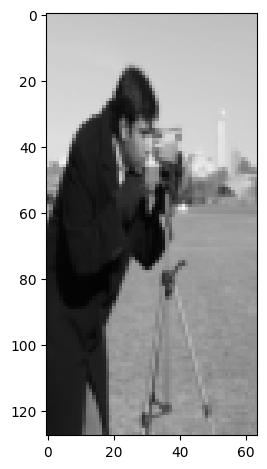

In [ ]:
from skimage.transform import resize
from skimage.feature import hog
from skimage.io import imshow

# Enter the size in (row,column) form that corresponds to
# width x height of 64x128
J = resize(I, (128,64))

# print the shape of J
print(J.shape)
imshow(J);

In [ ]:
hog_features, hog_image = hog(J,
                              pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2),
                              visualize=True#, multichannel=True
                             )

# Print the shape of the hog_features
hog_features.shape

(756,)

In [ ]:
128*64

8192

In 128x64 image with 16x16 pixels per patch: 8x4=32 patches and 7x3 blocks. Per block there are 36 bins (features). The features: 7x3x36

In [ ]:
7*3*36

756

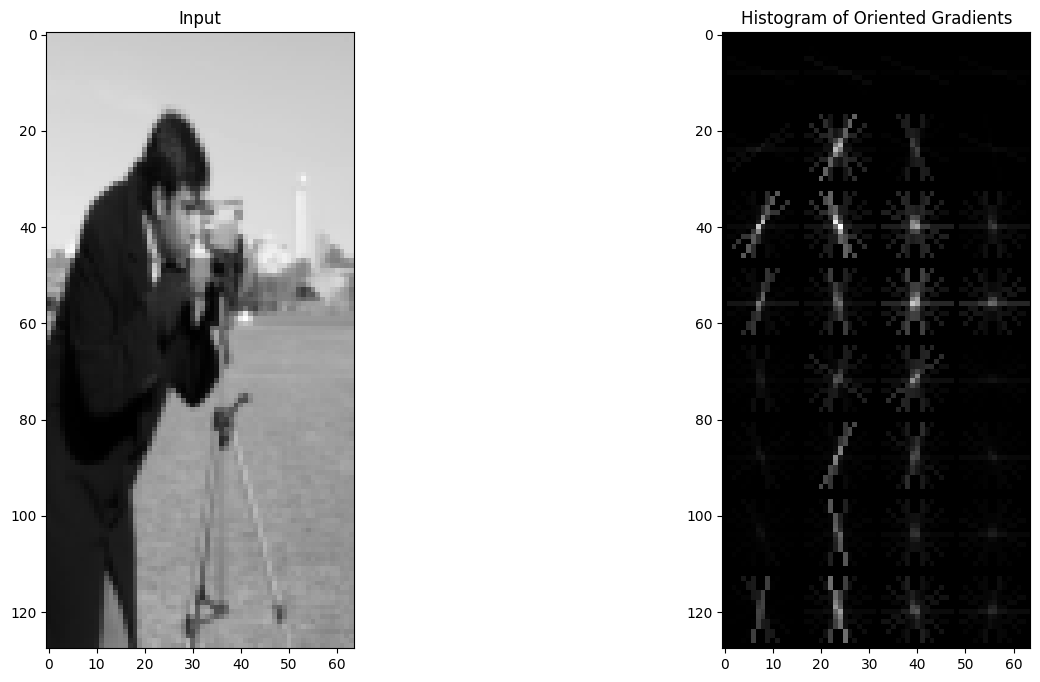

In [ ]:
from skimage import exposure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(J, cmap="gray")
ax1.set_title('Input')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.imshow(hog_image_rescaled, cmap="gray")
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## Other descriptors

Research question: Briefly summarize the (1) Scale Invariant Feature Transform (SIFT) and Speeded-up Robust Feature (SURF).


**Ans**:
To transform image data into scale-invariant coordinates
1. SIFT is a way for describing a local area in an image, describing through a so-called feature vector. Reducing an image content to a locally distinct points together with a description of that locally distinct point. The whole image is reduced to a set of points. We want to find again this set of points in other images, if the images were picturing the same thing, but say from different viewpoints. Say we have a locally distinct point, we describe it by taking the local neighborhood/ the surrounding image patch around the keypoint into account. This can be achieved by the intensity values or the changes in the intensity in this image patch, which becomes the descriptor vector. Blur the image with different levels of Gaussian blur.

2. SURF

Laplacian of Gaussian - Lindeberg (1998) - automatic scale detection using Laplacian of Gaussians and the Hessian matrix determinant,
$$\nabla^{2}G\left(x,y\right)=\frac{\partial^{2}}{\partial x^{2}}G\left(x,y\right)+\frac{\partial^{2}}{\partial y^{2}}G\left(x,y\right)$$

SURF

Detector: based on the Hessian matrix, uses difference of Gaussian (DoG) and integral image.

Descriptor: describes a distribution of Haar-wavelet responses within the interest point neighborhood, only uses 64 dimensions, introduced a new indexing step that is based on the sign of the laplacian

Integral image at location $(x,y)$: the sum of the pixels above and to the left of $(x,y)$ inclusive, $$ii(x,y)=\sum_{x^{\prime}\leq x,y^{\prime}\leq y}i\left(x^{\prime},y^{\prime}\right).$$

Hessian detector
$$ \mathcal{H}\left(\boldsymbol{x},\sigma\right)=\left[\begin{array}{cc}
L_{xx}\left(\boldsymbol{x},\sigma\right) & L_{xy}\left(\boldsymbol{x},\sigma\right)\\
L_{yx}\left(\boldsymbol{x},\sigma\right) & L_{yy}\left(\boldsymbol{x},\sigma\right)
\end{array}\right].$$

Continuous Gaussian filtering is approximated by box filters for Gaussian second order derivatives, which reduces the computation to $\mathcal{O}\left(1\right)$ time.